## Clasificadores binarios para la data de género

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from pyClass import ClasificadorBinario
import os

In [23]:
path = './DataFeatures'
os.listdir(path)

['FeaturesData_nri_uniform_Test.csv',
 'FeaturesData_nri_uniform_Train.csv',
 'FeaturesData_uniform_Test.csv',
 'FeaturesData_uniform_Train.csv']

### LBP nri uniform

In [18]:
dt = pd.read_csv(path+'/FeaturesData_nri_uniform_Train.csv')
dt_test = pd.read_csv(path+'/FeaturesData_nri_uniform_Test.csv')
print(dt.shape, dt_test.shape)

X = dt.drop('y', axis=1)
y = np.where(dt['y']=='Male', 1, 0)

X_test = dt_test.drop('y', axis=1)
y_test = np.where(dt_test['y']=='Male', 1, 0)

(1680, 60) (120, 60)


DUMMY
Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'strategy': 'stratified'}


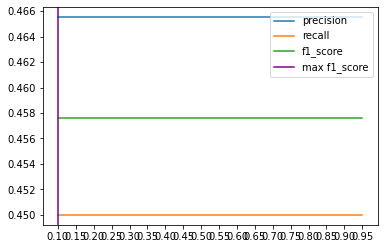

--------------------------------------------------------
Valor AUC:  0.4666666666666666
Matriz de confusion
col_0   0   1
row_0        
0      29  31
1      33  27
accuracy del modelo:  0.4666666666666667
              precision    recall  f1-score   support

           0       0.47      0.48      0.48        60
           1       0.47      0.45      0.46        60

    accuracy                           0.47       120
   macro avg       0.47      0.47      0.47       120
weighted avg       0.47      0.47      0.47       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

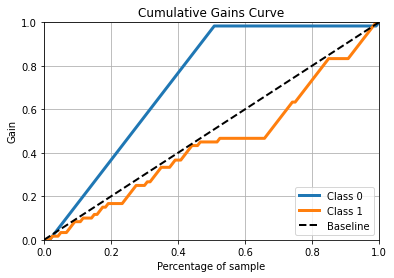

----------------------------------------------------------------------------------------------------
LOGIT
Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'C': 1000.0, 'penalty': 'l2'}


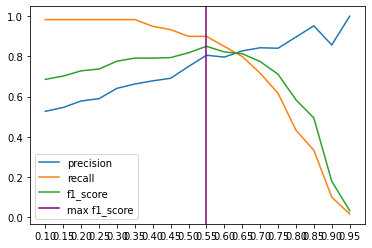

--------------------------------------------------------
Valor AUC:  0.8819444444444443
Matriz de confusion
col_0   0   1
row_0        
0      47  13
1       6  54
accuracy del modelo:  0.8416666666666667
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        60
           1       0.81      0.90      0.85        60

    accuracy                           0.84       120
   macro avg       0.85      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

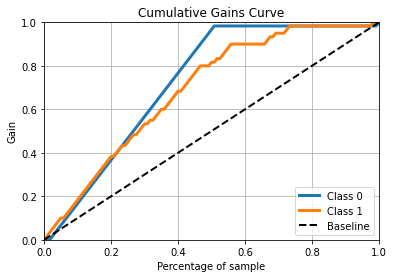

----------------------------------------------------------------------------------------------------
SVM
Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


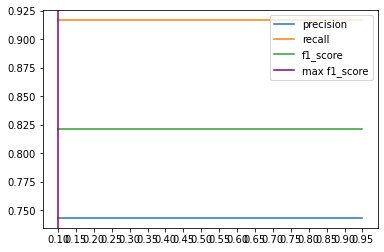

--------------------------------------------------------
Valor AUC:  0.8
Matriz de confusion
col_0   0   1
row_0        
0      41  19
1       5  55
accuracy del modelo:  0.8
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        60
           1       0.74      0.92      0.82        60

    accuracy                           0.80       120
   macro avg       0.82      0.80      0.80       120
weighted avg       0.82      0.80      0.80       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

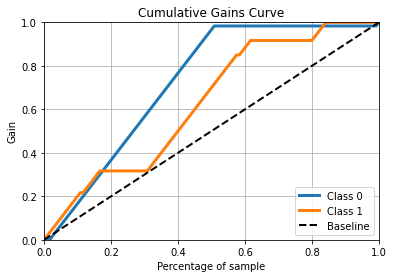

----------------------------------------------------------------------------------------------------
DECISION TREE
Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100}


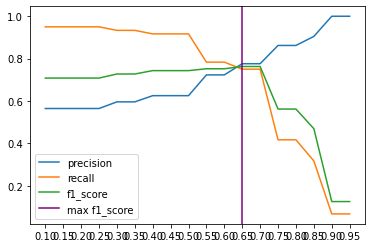

--------------------------------------------------------
Valor AUC:  0.8158333333333334
Matriz de confusion
col_0   0   1
row_0        
0      47  13
1      15  45
accuracy del modelo:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        60
           1       0.78      0.75      0.76        60

    accuracy                           0.77       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.77      0.77      0.77       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

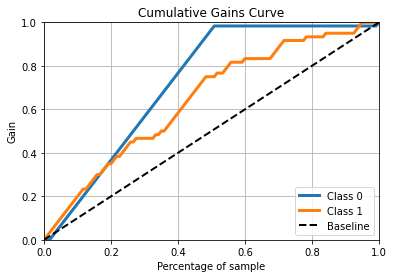

----------------------------------------------------------------------------------------------------
RANDOM FOREST
Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}


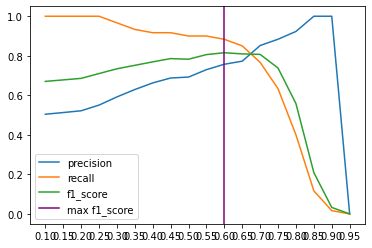

--------------------------------------------------------
Valor AUC:  0.875
Matriz de confusion
col_0   0   1
row_0        
0      43  17
1       7  53
accuracy del modelo:  0.8
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        60
           1       0.76      0.88      0.82        60

    accuracy                           0.80       120
   macro avg       0.81      0.80      0.80       120
weighted avg       0.81      0.80      0.80       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

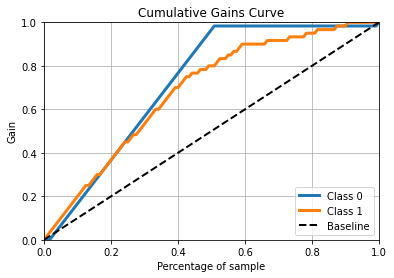

----------------------------------------------------------------------------------------------------
XGBOOST
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
{'alpha': 10, 'colsample_bytree': 0.5, 'eta': 0.05, 'eval_metric': 'auc', 'learning_rate': 0.05, 'max_depth': 13, 'n_estimators': 30, 'objective': 'binary:logistic', 'subsample': 0.9}


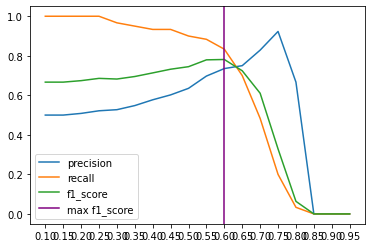

--------------------------------------------------------
Valor AUC:  0.8127777777777778
Matriz de confusion
col_0   0   1
row_0        
0      42  18
1      10  50
accuracy del modelo:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        60
           1       0.74      0.83      0.78        60

    accuracy                           0.77       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.77      0.77      0.77       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

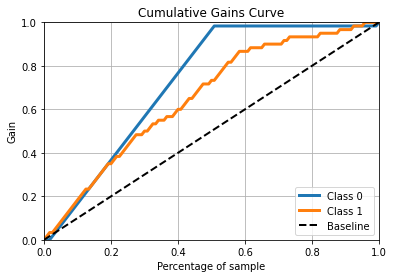

----------------------------------------------------------------------------------------------------


In [19]:
clfs = ClasificadorBinario.clasificadores_prueba(random_state=123)

clfs_optimizados = []
for clf in clfs:
    print(clf[0])
    clf_train = ClasificadorBinario.optimizar_parametros(clf[1], clf[2], X, y)
    clfs_optimizados.append((clf[0], clf_train, clf_train.best_params_))
    pc = ClasificadorBinario.optimizar_punto_corte(clf_train,X_test, y_test)
    ClasificadorBinario.probar_clasificador(clf_train, X_test, y_test, pc=pc)
    print('-'*100)

### LBP uniform

In [20]:
dt = pd.read_csv(path+'/FeaturesData_uniform_Train.csv')
dt_test = pd.read_csv(path+'/FeaturesData_uniform_Test.csv')
print(dt.shape, dt_test.shape)

X = dt.drop('y', axis=1)
y = np.where(dt['y']=='Male', 1, 0)

X_test = dt_test.drop('y', axis=1)
y_test = np.where(dt_test['y']=='Male', 1, 0)

(1680, 11) (120, 11)


DUMMY
Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'strategy': 'stratified'}


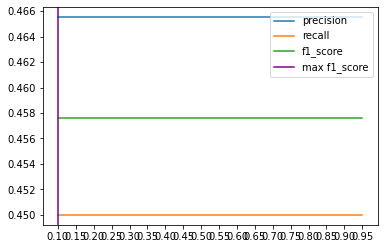

--------------------------------------------------------
Valor AUC:  0.4666666666666666
Matriz de confusion
col_0   0   1
row_0        
0      29  31
1      33  27
accuracy del modelo:  0.4666666666666667
              precision    recall  f1-score   support

           0       0.47      0.48      0.48        60
           1       0.47      0.45      0.46        60

    accuracy                           0.47       120
   macro avg       0.47      0.47      0.47       120
weighted avg       0.47      0.47      0.47       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

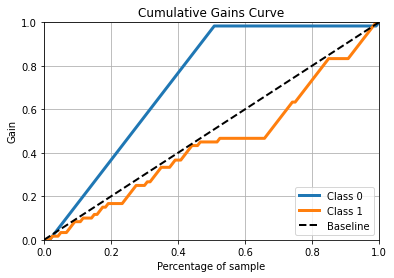

----------------------------------------------------------------------------------------------------
LOGIT
Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'C': 1000.0, 'penalty': 'l2'}


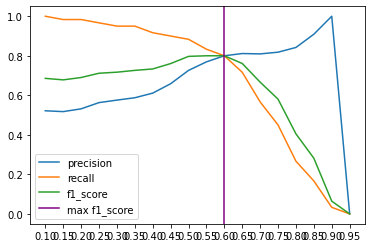

--------------------------------------------------------
Valor AUC:  0.8286111111111111
Matriz de confusion
col_0   0   1
row_0        
0      48  12
1      12  48
accuracy del modelo:  0.8
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        60
           1       0.80      0.80      0.80        60

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

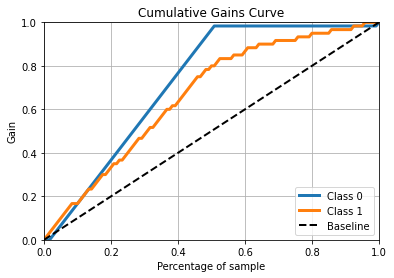

----------------------------------------------------------------------------------------------------
SVM
Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


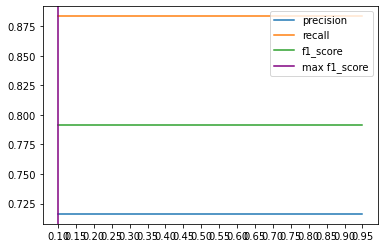

--------------------------------------------------------
Valor AUC:  0.7666666666666666
Matriz de confusion
col_0   0   1
row_0        
0      39  21
1       7  53
accuracy del modelo:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        60
           1       0.72      0.88      0.79        60

    accuracy                           0.77       120
   macro avg       0.78      0.77      0.76       120
weighted avg       0.78      0.77      0.76       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

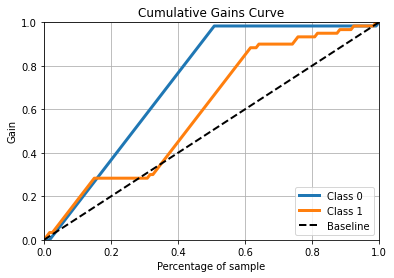

----------------------------------------------------------------------------------------------------
DECISION TREE
Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100}


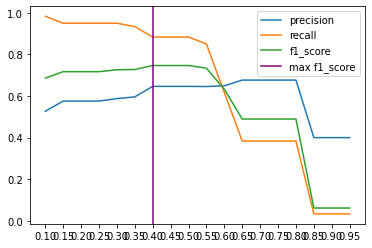

--------------------------------------------------------
Valor AUC:  0.7104166666666668
Matriz de confusion
col_0   0   1
row_0        
0      31  29
1       7  53
accuracy del modelo:  0.7
              precision    recall  f1-score   support

           0       0.82      0.52      0.63        60
           1       0.65      0.88      0.75        60

    accuracy                           0.70       120
   macro avg       0.73      0.70      0.69       120
weighted avg       0.73      0.70      0.69       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

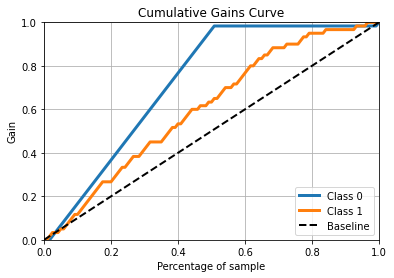

----------------------------------------------------------------------------------------------------
RANDOM FOREST
Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


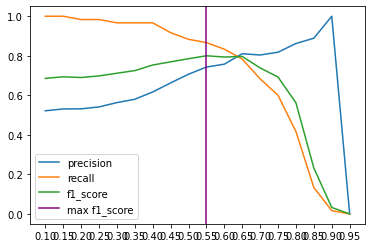

--------------------------------------------------------
Valor AUC:  0.8372222222222222
Matriz de confusion
col_0   0   1
row_0        
0      42  18
1       8  52
accuracy del modelo:  0.7833333333333333
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        60
           1       0.74      0.87      0.80        60

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

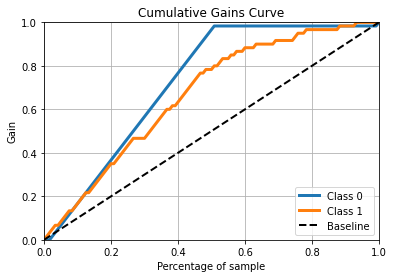

----------------------------------------------------------------------------------------------------
XGBOOST
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
{'alpha': 10, 'colsample_bytree': 0.7, 'eta': 0.05, 'eval_metric': 'auc', 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 30, 'objective': 'binary:logistic', 'subsample': 0.5}


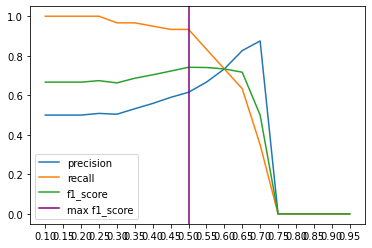

--------------------------------------------------------
Valor AUC:  0.8111111111111111
Matriz de confusion
col_0   0   1
row_0        
0      25  35
1       4  56
accuracy del modelo:  0.675
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        60
           1       0.62      0.93      0.74        60

    accuracy                           0.68       120
   macro avg       0.74      0.68      0.65       120
weighted avg       0.74      0.68      0.65       120

--------------------------------------------------------


<Figure size 432x288 with 0 Axes>

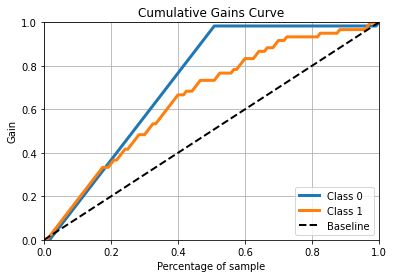

----------------------------------------------------------------------------------------------------


In [21]:
clfs = ClasificadorBinario.clasificadores_prueba(random_state=123)

clfs_optimizados = []
for clf in clfs:
    print(clf[0])
    clf_train = ClasificadorBinario.optimizar_parametros(clf[1], clf[2], X, y)
    clfs_optimizados.append((clf[0], clf_train, clf_train.best_params_))
    pc = ClasificadorBinario.optimizar_punto_corte(clf_train,X_test, y_test)
    ClasificadorBinario.probar_clasificador(clf_train, X_test, y_test, pc=pc)
    print('-'*100)
    

In [ ]:
## Visualización de las imagenes
## Visualización de los histogramas lbp

## PCA
## Eleccion #PCA
## Visualizacion imagenes

## RED MULTICAPA 
## RED CONVOLUCIONAL